# Supervised Learning and Linear Models.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section-1: Multiple Linear Regression with Machine Learning Approach.
  *   Objectives:
      *   Understand the steps included in building Machine Learning Models.
  *   Datasets:
      *   "student.csv".
  *   Learning Outcomes:
      *   Get familiar with various steps in building Machine Learning Model.
      *   Implement and build Multiple Linear Regression from Scratch with python and Numpy.
*   Section-2: Introduction to SKLEARN.
  *   Objectives:
      *   Introduction of SKLEARN, a machine learning model building library.
  *   Learning Outcomes:
      *   Ger familiar with SKLEARN library.
      
## Requirements:
Notebook Environment(Jupyter or Google Colab)

*   Author: Siman Giri


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Regression Algorithm.
___

The task of the Regression Algorithm is to find the $\color{purple}{maping}$ function black to map the $\color{black}{input}$ variable $\textbf{(X)}$ to the continious output variable$\textbf{(Y)}$.

Regression analysis estimates the realtionship between a dependent variables and independent variables.
In the class we talked about two different approach

1.   Machine Learning Approach i.e Using Gradient Descent
In this exercise you are expected to implement both the methods from scratch.


# Section-1: Multiple Linear Regression With Machine Learning Approach.


##Implement Multiple Linear Regression with Gradient Descent From scratch.

Multiple Linear Regression is a type of Linear Regression when the input has multiple features ((variables)).Similar to Simple Linear Regression, we have input variable(X) and output variable(Y). But the input variable has nn features. Therefore, we can represent this linear model as follows;
\begin{align}
        \mathbf{Y} = \theta_o + \theta_1x_1 + \theta_2x_2 + .....+ \theta_nx_n
    \end{align}
Rewriting the equation:where $x_0 = 1$:
\begin{align}
        \mathbf{Y} = \theta_ox_0 + \theta_1x_1 + \theta_2x_2 + .....+ \theta_nx_n
    \end{align}
Convert the equation to matrix:
\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
where:
\begin{align}
        \mathbf{\theta} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

Our function can now be defined as:
\begin{align}
        \mathbf{h_\theta(.)}  = \theta^T x
    \end{align}
And the cost function will be:
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2n} \sum_{i=1}^n(h_\theta(x_i) - y_i)^2
    \end{align}

Implementation:

Start with Necessary Imports:


In [4]:
path2 = "/content/drive/MyDrive/student.csv"


In [5]:
# Necessary imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0)

## STEP-1: Define Decision Process.

*   Objective of the Task:
  *   To Predict the marks obtained in writing based on the marks of Math and Reading.
*   Tasks to Do:
  1.   Read and Observe the Dataset.
  2.   Print top(5) and bottom(5) of the dataset {Hint: pd.head and pd.tail}.
  3.   Print the Information of Datasets.
  3.   Identify $\color{red}{\textbf{Dependent}}$ $\color{red}{\textbf{Variable}}$ and $\color{red}{\textbf{Independent}}$ $\color{red}{\textbf{Variable}}$.
            *   {Hint: $\textbf{Variables}$ depends on the $\textbf{Objective}$ of the task.}
  1.   Split the data into Independent and Dependent Arrays { Hint: Split and Convert pandas dataframe to numpy arrays-You can use df.to_numpy()}.
  6. Visualize the dataset, Visualizing multi-variate dataset is not easy, In this particular case we can use special 3-D plot, Please go through the code.

In [6]:
dt= pd.read_csv(path2)
dt.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [7]:
dt.tail()

,Math,Reading,Writing
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78
999,66,66,72


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [9]:
math = dt['Math'].to_numpy()
read = dt['Reading'].to_numpy()
write = dt['Writing'].to_numpy()

In [10]:
# Sanity Check
if math.shape == read.shape == write.shape:
  print("Proceed Further")
else:
  print("Array Conversion Error: Try Again")

Proceed Further


### Visualize the Dataset.

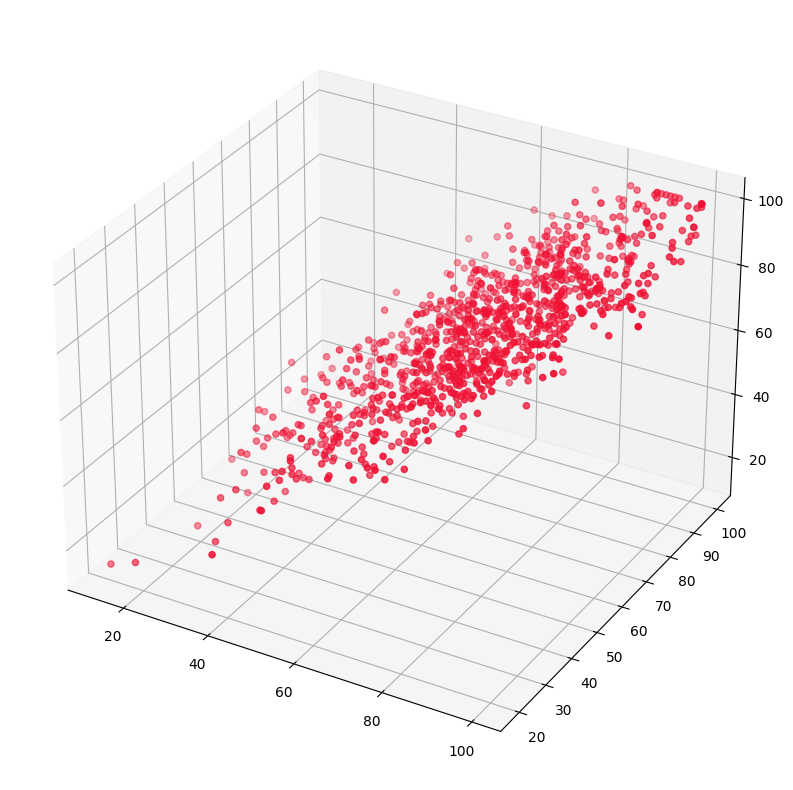

In [11]:
from mpl_toolkits.mplot3d import Axes3D
# Plotting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.scatter(math, read, write, color='#ef1234')
plt.show()

### Store the arrays in the Matrix Form:
Implement Following Equations:

\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
In Machine Learning parameters $\theta$ are also called weights, so from this step onwards we represent $\theta$ as $\textbf{W}$.

Here-Now:
\begin{align}
        \mathbf{Y} = W^T X + W_0
    \end{align}

\begin{align}
        \mathbf{W} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

In [13]:
X0 = np.ones(len(dt['Math']))
X2 = np.array([X0, dt['Math'], dt['Reading']]).T
W = np.array([0, 0, 0])
Y2 = np.array(dt['Writing'])
print(X0)
print(X2)
print(W)
print(Y2)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

## Step-2: Implement a Error/Cost Function.

We will use the Cost function: Mean Square Error i.e.
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(y_{pred} - y_i)^2
    \end{align}

Further Simplifications:

\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x_i) - y_i)^2
    \end{align}
Here:
\begin{align}
  h_\theta = \theta_1*x
    \end{align}

Note:
In Machine Learning, m: denotes the length of the array (total No of rows in our case).



In [22]:
#Define the cost function
def cost_function(X, Y, W):
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
      X: Feature Matrix
      Y: Target Matrix
      W: Weight Matrix
    Output Parameters:
      J: accumulated mean square error.
    """
    m = len(Y)
    J = np.sum((X.dot(W)-Y)**2)/(2*m)
    return J

In [23]:
inital_cost = cost_function(X2, Y2, W)
print(inital_cost)

2470.11


## Step-3: Optimization Algorithm

Our goal in this task is to minimize our error function with each input of examples(input data).
One of the most suitable methods to do the same is
\begin{align}
$\color{red}{\textbf{GRADIENT DESCENT ALGOROTHIM.}}$
\end{align}

Implement GDA from Scratch.

Function to estimate:
  *   $h_\theta(x) = \theta^T x$

Loss function to minimize:
  *   $(h_\theta(x) - y)^2$

Gradient: Decsent update:
  *   $\theta_(j+1)   = \theta_j - LR(D_\theta)$
  *   $D(\theta) = 1/m * (\theta^T * X)$ i.e. Derivative of parameters/weights.





In [24]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        # Hypothesis Values
        Y_pred = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = Y_pred - Y
        # Gradient Calculation
        dw = (X.T.dot(loss))/(m)
        # Changing Values of B using Gradient
        W_update = W - alpha * dw
        # New Cost Value
        cost = cost_function(X, Y, W_update)
        cost_history[iteration] = cost

    return W_update, cost_history


In [25]:
# 100000 Iterations
alpha = 0.0001 # Learning Rate.
new_weights, cost_history = gradient_descent(X2, Y2, W, alpha, 100000)

# New Values of
print(new_weights)

# Final Cost of our Iterations.
print(cost_history[-1])

[0.0068616 0.4801185 0.5006844]
18.076027940915417


## Step-4: Evaluate a Model.

In this section, we will use $b_1$ and $b_0$ calculated from step-2 to make a prediction.

Lets see How Good is our model. As discussed in the lecture and Tutorial we will use Root Mean Squared Error and Coefficient of Determination( R2 )
Mathematically:
\begin{align}
        \mathbf{RMSE}  = \sqrt{\sum_{i=1}^n (1/m (\hat{y_i} - y_i)^2)}
    \end{align}

\begin{align}
        \mathbf{R^2}  = 1 - \frac{SSR}{SST}
    \end{align}

\begin{align}
         \mathbf{SST} = \sum_{i=1}^n (y_i - \bar{y})^2
    \end{align}
\begin{align}
         \mathbf{SSR} = \sum_{i=1}^n (y_i - \hat{y_i})^2
    \end{align}

In [26]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rmse: Root Mean Square.
  """
  rmse = np.sqrt(sum((Y - Y_pred)**2)/len(Y))
  return rmse

# Model Evaluation - R2

def r2(Y, Y_pred):
  """
   This Function calculates the R Squared Error.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rsquared: R Squared Error.
    """
  mean_y = np.mean(Y)
  ss_tot = np.sum((Y - mean_y)**2)
  ss_res = np.sum((Y - Y_pred)**2)
  r2 = 1 - (ss_res/ss_tot)
  return r2


# Let's Check Model Performance:


In [27]:
Y_pred = X2.dot(new_weights)

print(rmse(Y2, Y_pred))
print(r2(Y2, Y_pred))

6.01265797146577
0.8442155132417348


# Section-2: Introduction to SKLEARN.
What is scikit-learn or sklearn?
>  

1.   Scikit-learn is probably the most useful library for machine learning in python.
2.   The sklearn library contains a lot of efficient tools for machine learning and statistical modeling

> Please note that sklearn is used to build machine learning models. It should not be used for reading the data, manipulating and summarizing it. There are better libraries for that (e.g. NumPy, Pandas etc.)


## Build Linear Regression with help of SKLEARN.


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


# Practise Tasks:

For the following Datasets:


Insurance.csv: Try implementing Multiple Linear Regression from Scratch: While Doing that also practise following:
  1.   Can you Identify Qualitative and Quantitative Varaible.
  2.   Drop all the Qualitative Varaible from the dataframe.
  3.   If you do not want to drop the qualitative varaible, you can convert them into numeric variable as you did in Assignment-1. {You can also try sklearn label encoder function.}
  4.   Practise your Visualization Skills.
  



In [46]:
idt = pd.read_csv("/content/drive/MyDrive/insurance.csv")

In [47]:
idt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
idt.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [49]:
idt['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [50]:
idt['sex']=idt['sex'].replace({"male":0, "female":1})
print("sex", idt['sex'].unique())
idt['smoker']=idt['smoker'].replace({"no":0, "yes":1})
print("smoker", idt['smoker'].unique())
idt['region']=idt['region'].replace({"southwest":0, "southeast":1, "northwest":2, "northeast":3})
print("region", idt['region'].unique())


sex [1 0]
smoker [1 0]
region [0 1 2 3]


In [51]:
idt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [52]:
idt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [53]:
x = idt[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].to_numpy()
y= idt['charges'].to_numpy()

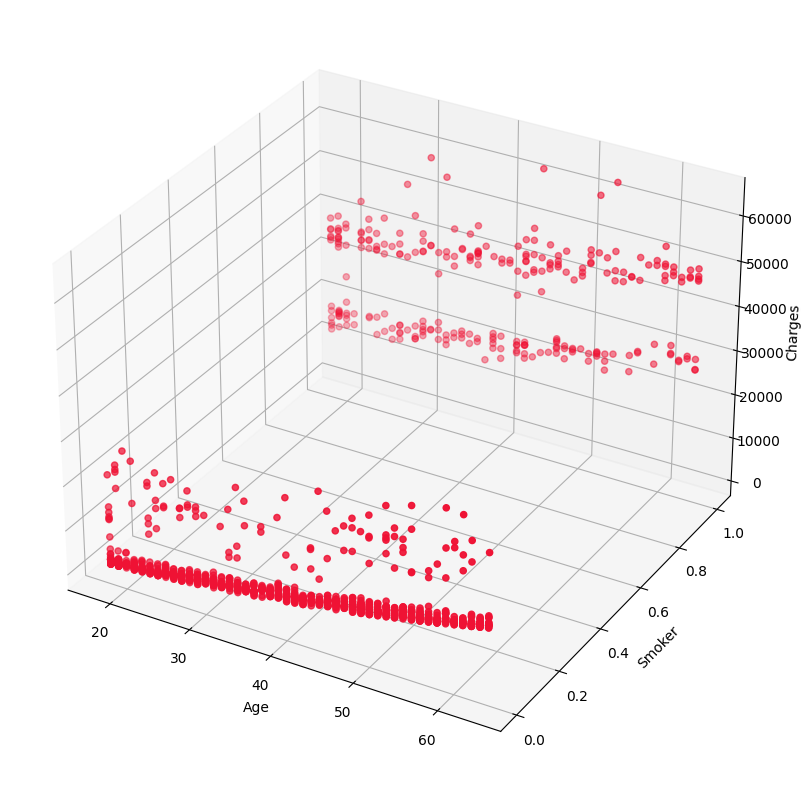

In [54]:
# Visualizing the dataset, using special 3-D plot.
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(24, 10))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(idt['age'],idt['smoker'],idt['charges'],  color='#ef1234')
ax.set_xlabel('Age')
ax.set_ylabel('Smoker')
ax.set_zlabel('Charges')
plt.show()

In [56]:
X0 = np.ones(len(idt['age']))
X2 = np.array([X0, idt['age'], idt['smoker']]).T
W = np.array([0, 0, 0])
Y2 = np.array(idt['charges'])
print(X0)
print(X2)
print(W)
print(Y2)

[1. 1. 1. ... 1. 1. 1.]
[[ 1. 19.  1.]
 [ 1. 18.  0.]
 [ 1. 28.  0.]
 ...
 [ 1. 18.  0.]
 [ 1. 21.  0.]
 [ 1. 61.  1.]]
[0 0 0]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [57]:
#Define the cost function
def cost_function(X2, Y2, W):
    m = len(Y2)
    J = np.sum((X2.dot(W) - Y2) ** 2)/(2 * m)
    return J
inital_cost = cost_function(X2, Y2, W)
print(inital_cost)

161323436.79435235


In [58]:
def gradient_descent(X2, Y2, W, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y2)

    for iteration in range(iterations):
        # Hypothesis Values
        Y_predicted = X2.dot(W)
        # Difference b/w Hypothesis and Actual Y
        loss = Y_predicted - Y2
        # Gradient Calculation
        dw = (X2.T.dot(loss) ) / (m)
        # Changing Values of B using Gradient
        W_update = W - alpha * dw
        # New Cost Value
        cost = cost_function(X2, Y2, W_update)
        cost_history[iteration] = cost

    return W_update, cost_history

In [59]:
# 100000 Iterations
alpha = 0.0001 # Learning Rate.
W_weights, cost_history = gradient_descent(X2, Y2, W, alpha, 100000)

# New Values of
print(W_weights)

# Final Cost of our Iterations.
print(cost_history[-1])

[ 1.32704223 57.11305622  0.65633509]
131514568.63137142


In [60]:
# Model Evaluation - RMSE
m = len(Y2)
Y_pred = X2.dot(W)
def rmse(Y2, Y_pred):
    mse = np.sum((1/m) * ( Y_pred- Y2)**2)
    rmse = np.sqrt(mse)
    return rmse

# Model Evaluation - R2

def r2(Y2, Y_pred):
    mean_y = np.mean(Y2)
    ss_tot = np.sum((Y2 - mean_y)**2)
    ss_res =np.sum((Y2-Y_pred)**2)
    r2 = 1 - (ss_res / ss_tot)
    return r2
Y_pred = X2.dot(W_weights)

print(rmse(Y2, Y_pred))
print(r2(Y2, Y_pred))

16218.173055641715
-0.7948967632893955


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([idt['age'], idt['smoker']]).T
Y = np.array(idt['charges'])

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

6389.5769572264235
0.72140082605772
